In [15]:

import pandas as pd  # Import pandas library for data manipulation and analysis
from sklearn.linear_model import LinearRegression  # Import LinearRegression class from scikit-learn for linear regression modeling
from sklearn.model_selection import train_test_split  # Import train_test_split function for splitting the dataset into train and test sets
from sklearn.metrics import mean_squared_error  # Import mean_squared_error function for evaluating model performance
import matplotlib.pyplot as plt  # Import matplotlib.pyplot module for data visualization
import seaborn as sns  # Import seaborn library for advanced data visualization



Let's start by reading in our .csv. This dataset contains information about the cost of living in almost 5000 cities across the world.  
To draw conclusions, additional code and analysis need to be performed on the gcl DataFrame.

In [16]:
# Read the dataset
gcl = pd.read_csv('C:\\Users\\user\\Desktop\\cost-of-living.csv')
gcl

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46
...,...,...,...,...,...,...,...,...,...,...
4869,4869,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4870,4870,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4871,4871,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,NaN,1.82,0.62
4872,4872,Iqaluit,Canada,29.78,74.61,13.77,6.70,8.93,3.72,3.54


The dataset consists of 4874 rows and 10 columns. Each row represents a specific city, and the columns contain information about the cost of living factors in that city.

One way to deal with NaN cells is to remove rows that contain those  cells.

In [17]:
gcl[gcl.isna().any(axis=1)]

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7
37,37,Baoding,China,NaN,13.97,3.91,NaN,NaN,2.79,0.46
52,52,Heze,China,NaN,NaN,4.89,NaN,NaN,4.19,0.49
72,72,Nanning,China,2.30,20.95,4.40,NaN,2.79,3.95,0.64
80,80,Huanggang,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,90,Yulin,China,2.30,20.95,4.40,NaN,2.79,3.95,0.64
...,...,...,...,...,...,...,...,...,...,...
4868,4868,Queenstown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4869,4869,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4870,4870,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4871,4871,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,NaN,1.82,0.62



819 rows means that there are 819 rows in the DataFrame, implying that there are 819 rows that contain at least one missing value.
10 columns means that the DataFrame has 10 columns, indicating that the resulting DataFrame includes all the columns from the original DataFrame gcl.

# What are the top ten cities with the highest and lowest cost of living?

In [25]:
# Drop rows with NaN values in the 'x1' column
gcl = gcl.dropna(subset=['x1'])

# Group the data by city and calculate the average cost of living
avg_cost_of_living = gcl.groupby('city')['x1'].mean().reset_index()

# Sort the data by the cost of living index in descending order
sorted_data = avg_cost_of_living.sort_values(by='x1', ascending=False)

# Display the top 10 cities with the highest cost of living
top_10_cities = sorted_data.head(10)
print("Top 10 cities with the highest cost of living:")
print(top_10_cities)

# Display the top 10 cities with the lowest cost of living
bottom_10_cities = sorted_data.tail(10)
print("\nTop 10 cities with the lowest cost of living:")
print(bottom_10_cities)


Top 10 cities with the highest cost of living:
                     city     x1
3993          Turkmenabat  56.98
1053              Dasoguz  56.98
2260               Lorain  55.00
3657  South Miami Heights  50.00
3727               Summit  50.00
4201                Wayne  50.00
1042               Dalton  50.00
995              Cranford  50.00
1326           Fort Dodge  50.00
2125     Lake Havasu City  50.00

Top 10 cities with the lowest cost of living:
            city    x1
64         Akure  0.68
1815  Jhang City  0.67
1533      Gujrat  0.67
322   Bahawalpur  0.67
1808    Jendouba  0.62
1248       Erode  0.61
481    Bhavnagar  0.61
3550  Shekhupura  0.53
2399      Mardan  0.45
3482    Sargodha  0.45


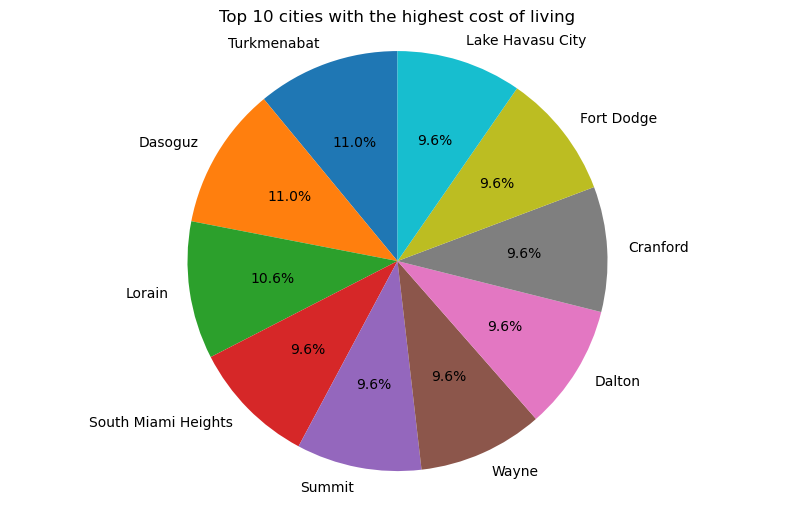

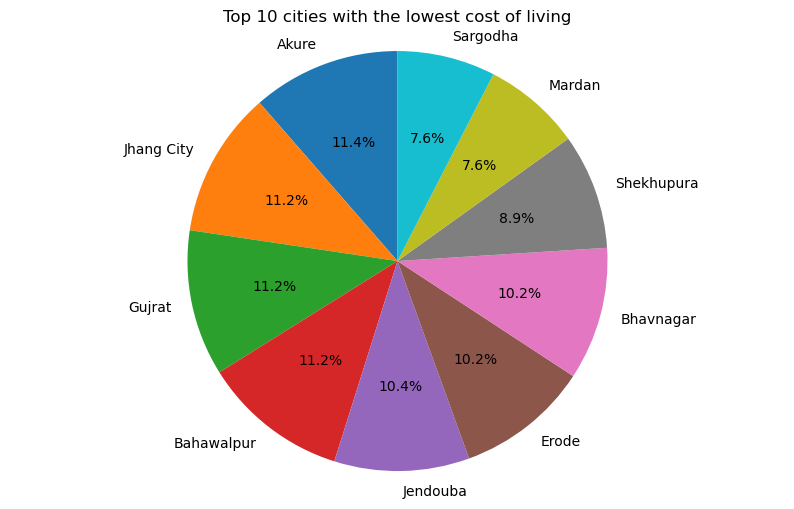

In [26]:


# Pie chart for the top 10 cities with the highest cost of living
plt.figure(figsize=(10, 6))
plt.pie(top_10_cities['x1'], labels=top_10_cities['city'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 cities with the highest cost of living')
plt.axis('equal')
plt.show()

# Pie chart for the bottom 10 cities with the lowest cost of living
plt.figure(figsize=(10, 6))
plt.pie(bottom_10_cities['x1'], labels=bottom_10_cities['city'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 cities with the lowest cost of living')
plt.axis('equal')
plt.show()


The two pie charts visualize the distribution of the highest and lowest cost of living among the top 10 cities.
The percentage values displayed inside each section of the pie represent the proportion of the cost of living value for each city relative to the total cost of living values for all cities in that particular category.

# How can we compare the variables 'x1' and 'x7' for the first 7 unique countries using a scatter plot?

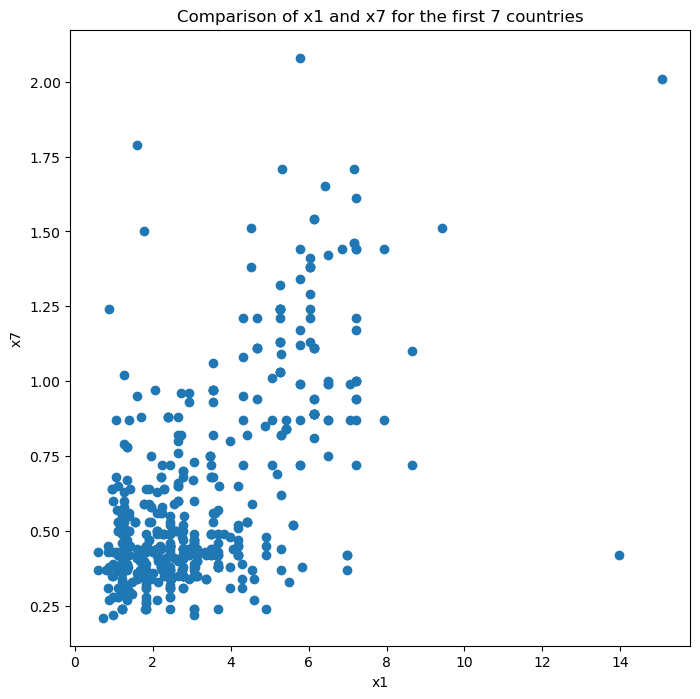

In [27]:
# Select the first 7 countries from the dataset
countries = gcl['country'].unique()[:7]

# Filter the dataset for the selected countries
filtered_data = gcl[gcl['country'].isin(countries)]

# Select the 'x1' and 'x7' variables from the filtered dataset
x1 = filtered_data['x1']
x7 = filtered_data['x7']

plt.figure(figsize=(8, 8))
plt.scatter(x1, x7)
plt.xlabel('x1')
plt.ylabel('x7')
plt.title('Comparison of x1 and x7 for the first 7 countries')
plt.show()



Each point on the plot corresponds to a specific country, and its position on the plot indicates the values of 'x1' and 'x7' for that country.

# Which are the top 5 cities based on the descending order of the 'x1' variable?

In [28]:
# Sort the data by 'x1' variable in descending order
sorted_data = gcl.sort_values('x1', ascending=False).head(5)

# Rank the cities based on 'x1' variable
sorted_data['Rank'] = range(1, len(sorted_data) + 1)

# Select the 'City' and 'x1' columns
result = sorted_data[['city', 'x1', 'Rank']]

# Print the result
print(result)


             city     x1  Rank
1540      Dasoguz  56.98     1
1016  Turkmenabat  56.98     2
1810       Lorain  55.00     3
4428     Cranford  50.00     4
3328       Summit  50.00     5


We understand from the result that the city "Dasoguz" has the highest 'x1' value of  56.98 and is ranked 1.


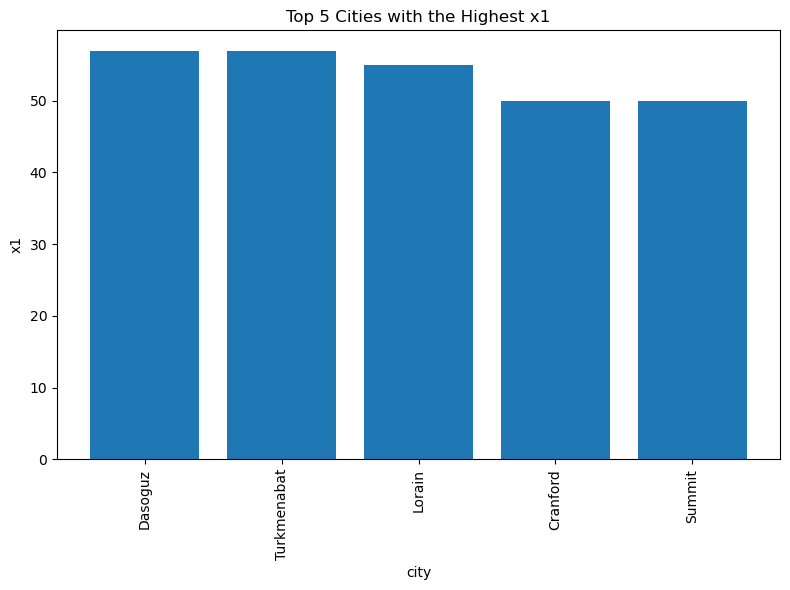

In [29]:
# Plot the graphic
plt.figure(figsize=(8, 6))
plt.bar(result['city'], result['x1'])
plt.xlabel('city')
plt.ylabel('x1')
plt.title('Top 5 Cities with the Highest x1')
plt.xticks(rotation=90)#rotates the x-axis labels by 90 degrees to prevent overlapping if the city names are long.
plt.tight_layout()
plt.show()


When we run the code is a bar chart that represents the top 5 cities with the highest values for the 'x1' variable.
Each bar in the chart corresponds to a city and its corresponding 'x1' value. The height of each bar represents the magnitude of the 'x1' value for the respective city.

# Which are three countries that have the most expensive x7?

In [30]:
top_three_x7 = gcl.nlargest(3, 'x7')
top_three_x7[['country', 'x7']]


,country,x7
4215,United States,8.00
1540,Turkmenistan,7.12
535,Turkmenistan,5.63


The United States has the highest value of 8.00 in the 'x7' variable, indicating it has the most expensive cost of living compared to other countries in the dataset. Turkmenistan follows next with a value of 5.63, and it appears twice in the results. 

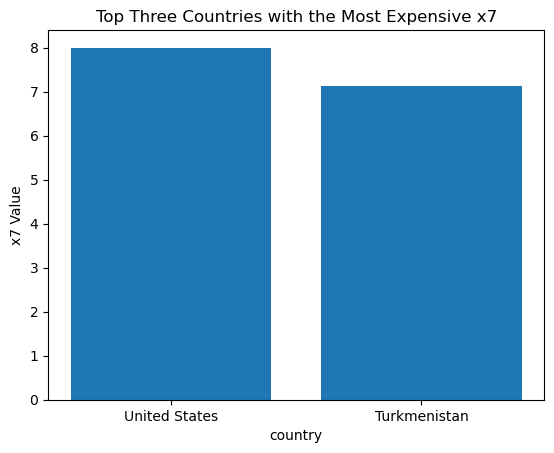

In [31]:
x7_values = top_three_x7['x7']
countries = top_three_x7['country']
plt.bar(countries, x7_values)
plt.xlabel('country')
plt.ylabel('x7 Value')
plt.title('Top Three Countries with the Most Expensive x7')

plt.show()

Each bar represents a country, and the height of the bar corresponds to the 'x7' value for that country.

# Which is the most expensive variable, x1 or x2 ?

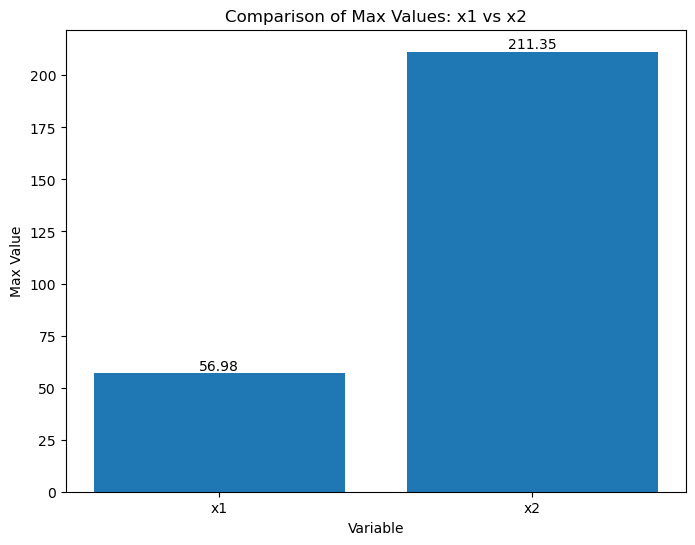

x2 is more expensive than x1.


In [32]:
max_x1 = gcl['x1'].max()
max_x2 = gcl['x2'].max()
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['x1', 'x2'], [max_x1, max_x2])
plt.xlabel('Variable')
plt.ylabel('Max Value')
plt.title('Comparison of Max Values: x1 vs x2')

# Add labels to the bars
plt.text(0, max_x1, str(max_x1), ha='center', va='bottom')
plt.text(1, max_x2, str(max_x2), ha='center', va='bottom')

# Show the plot
plt.show()

# Compare the maximum values and print the result
if max_x1 > max_x2:
    print("x1 is more expensive than x2.")
else:
    print("x2 is more expensive than x1.")


Since the maximum value of 'x2' is greater than the maximum value of 'x1', the code determines that 'x2' is more expensive and prints x2 is more expensive than x1.Also the bar chart visually shows that x2 is more expensive than x1. The labels on top of each bar indicate the exact value of the maximum for that variable.

# What are the names of the first 15 cities where the value in the 'x4' column is greater than 2?

In [11]:
cities_x4 = gcl[gcl['x4'] > 2].head(15)
cities_x4


,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46
5,5,Bangkok,Thailand,2.60,28.09,5.62,2.25,4.21,2.06,0.50
6,6,Kolkata,India,2.00,14.69,3.67,2.20,3.67,1.60,0.36
8,8,Mumbai,India,3.67,18.36,3.67,2.45,4.28,2.49,0.46
10,10,Osaka,Japan,7.22,43.31,5.47,3.25,3.61,3.19,1.17
12,12,Karachi,Pakistan,2.23,11.14,3.56,2.12,2.67,1.39,0.29
13,13,Dhaka,Bangladesh,1.87,11.24,4.68,5.62,4.92,1.89,0.27
14,14,Sao Paulo,Brazil,7.45,37.27,6.52,2.24,3.35,1.51,1.08
15,15,Tokyo,Japan,7.22,43.31,5.05,4.30,5.05,3.42,1.21


The first city that satisfies the condition 'x4' > 2 is Jakarta. The values of the variables for Jakarta:x1=2.54,
x2=22.25,etc)

C:\Users\user\AppData\Local\Temp\ipykernel_21388\2077701151.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = cities_x4.pivot('city', 'x4', 'x4')


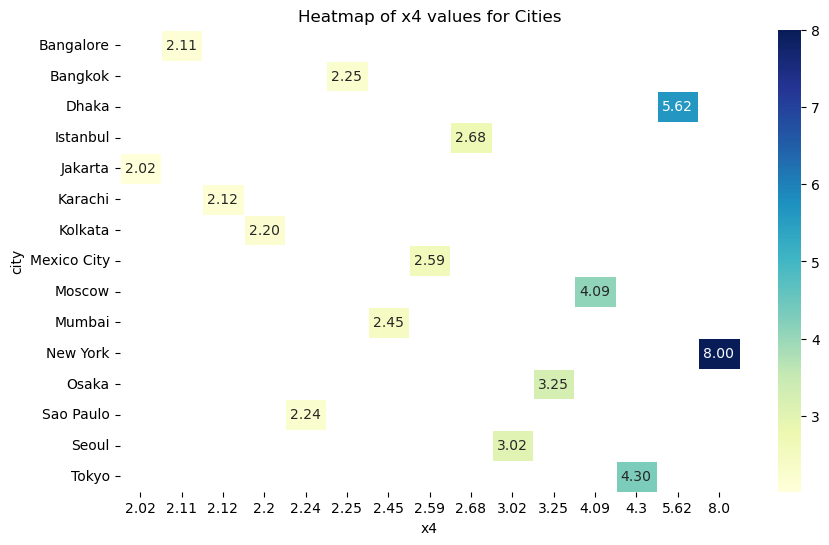

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset based on x4 > 2
cities_x4 = gcl[gcl['x4'] > 2].head(15)
# Create a pivot table for the heatmap
heatmap_data = cities_x4.pivot('city', 'x4', 'x4')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of x4 values for Cities')
plt.xlabel('x4')
plt.ylabel('city')
plt.show()


 Each city is represented by a row in the heatmap, and the corresponding 'x4' values are plotted along the columns. The color intensity in the heatmap represents the magnitude of the 'x4' values, with darker shades indicating higher values.
The darker the color of a cell, the higher the 'x4' value for that city(New York).  Conversely, the brighter the color, the lower the 'x4' value(Jakarta). 

# Which cities have a price difference between 'x4' and 'x5' greater than 1?

In [35]:
cities_rise = gcl[gcl['x4'] - gcl['x5'] > 1]['city'] #filters the DataFrame gcl based on the condition 
#that the difference between the values in the 'x4' and 'x5' columns is greater than 1.  

# Count the occurrences of each city
city_counts = cities_rise.value_counts().sort_values(ascending=False)

# Convert to DataFrame
city_table = city_counts.to_frame().reset_index()
city_table.columns = ['City', 'Count']

# Display the table
city_table


,City,Count
0,Paris,1
1,Papeete,1
2,Changchun,1
3,Riverside,1
4,Milan,1
...,...,...
363,Vandenberg Village,1
364,Pontotoc,1
365,Amalfi,1
366,Meilen,1


The table has 349 rows and includes cities such as Paris, Saint-Denis, Riverside, Milan, Rajkot, and many others, with each city occurring once in the dataset.

# Which cities have a value greater than 3 in the 'x4' column?

In [36]:
cities_x4 = gcl[gcl['x4'] > 3]['city']
cities_x4

4              Seoul
10             Osaka
13             Dhaka
15             Tokyo
16            Moscow
            ...     
4862    Port Hedland
4864    Port Douglas
4865     Rockhampton
4867    Egilsstadhir
4872         Iqaluit
Name: city, Length: 2111, dtype: object

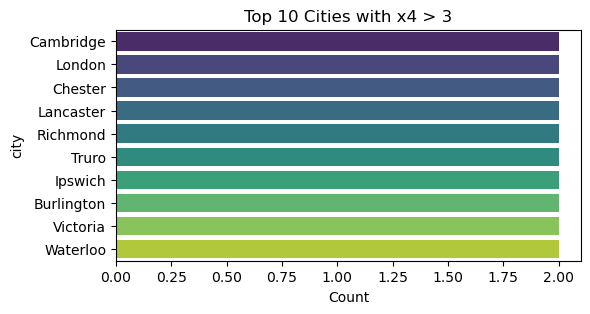

In [37]:
# Count the occurrences of each city
city_counts = cities_x4.value_counts().sort_values(ascending=False)

# Select top 10 cities
top_10_cities = city_counts.head(10)

# Create the bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('city')
plt.title('Top 10 Cities with x4 > 3')
plt.show()


It then selects the top 10 cities with the highest counts. The code creates a bar plot using seaborn library to visualize the count of occurrences for each city. The length of each bar indicates the frequency of occurrence for the corresponding city.The darker-colored bars represent cities with a higher count of occurrences, indicating that they have more 'x4' values greater than 3. On the other hand, the brighter-colored bars represent cities with a lower count, indicating that they have relatively fewer occurrences of 'x4' values greater than 3.


# Which variable, 'x5' or 'x6', has the highest average value?

In [38]:
# Calculate the average values of x5 and x6
avg_x5 = gcl['x5'].mean()
avg_x6 = gcl['x6'].mean()

# Compare the average values
if avg_x5 > avg_x6:
    higher_avg = 'x5'
    print(avg_x5)
elif avg_x6 > avg_x5:
    higher_avg = 'x6'
    print(avg_x6)
else:
    higher_avg = 'x5 and x6 have the same average'

# Print the result
print("The average of", higher_avg, "is higher.")



3.878609163160356
The average of x5 is higher.


The result indicates that, the average value of variable x5 is higher than the average value of variable x6. This suggests that, on average, the values of x5 tend to be greater than the values of x6 in the dataset.
Then we will create a bar plot to visually compare the average values of variables x5 and x6.

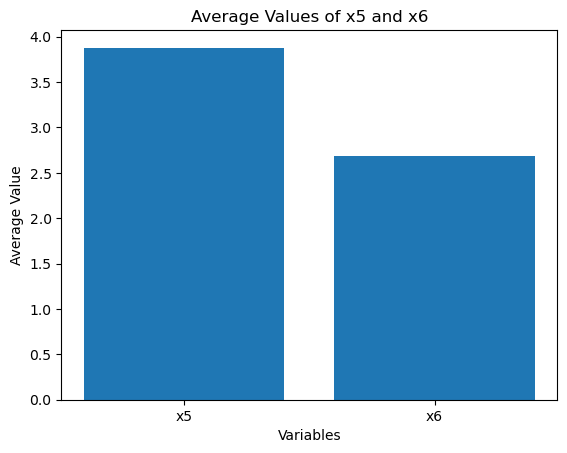

In [39]:
# Create a bar plot
labels = ['x5', 'x6']
values = [avg_x5, avg_x6]

plt.bar(labels, values)
plt.xlabel('Variables')
plt.ylabel('Average Value')
plt.title('Average Values of x5 and x6')

# Display the plot
plt.show()


As is evident from the bar plot,the bar representing x5 is taller than the bar representing x6. This means that the average value of x5 is higher than the average value of x6.

*We also fit a linear regression model to predict the 'x1' values based on the 'x2' values and evaluate the performance of the model using MSE. Using linear regression allows for interactive analysis, data visualization  and iterative development.

Mean Squared Error: 18.42419680411538


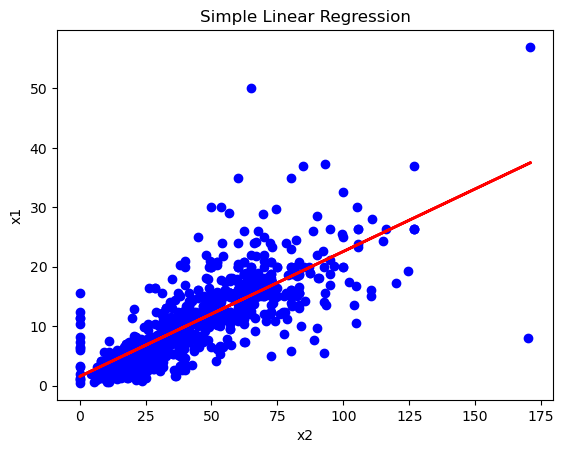

In [40]:
 #Select the columns for analysis
X = gcl[['x2']].fillna(0)  # Fill null values with 0 
y = gcl['x1'].fillna(0)   

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) as an evaluation metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the Linear Regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('x2')
plt.ylabel('x1')
plt.title('Simple Linear Regression')
plt.show()


The result indicates that the model's predictions for the dependent variable ('x1') based on the independent variable ('x2') have a relatively higher average squared difference from the actual values. A MSE of 18.4242 might be considered relatively high, suggesting that the regression model may have room for improvement.

The points are plotted in blue color, indicating the actual values. The red line in the plot represents the predicted values of 'x1' based on the linear regression model.The line represents the best-fit line that minimizes the difference between the predicted and actual values.  The points that  align closely to the red line, indicates a good fit of the model.
On the other hand,  the points that  are more scattered and do not align well with the line, it suggests that the linear regression model may not be a good fit for the data.

# Can we predict the cost of living index (x1) based on the other price factors (x2, x3, x4, x5, x6, x7) using a regression model? 

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


# Select the features and target variable
X = gcl[['x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y = gcl['x1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the imputed training data
model.fit(X_train_imputed, y_train)

# Predict the cost of living index for the imputed test data
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = model.score(X_test_imputed, y_test)
print(f"Accuracy: {accuracy}")

# prediction for a new set of price factors
new_data = [[1.2, 2.5, 3.1, 4.2, 5.5, 6.8]] 
new_data_imputed = imputer.transform(new_data)
predicted_index = model.predict(new_data_imputed)
print(f"Predicted cost of living index: {predicted_index}")


Accuracy: 0.7027694005033526
Predicted cost of living index: [13.95938566]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Accuracy: 0.7027694005033526 ---------->This represents the accuracy score of the linear regression model on the test data. An accuracy score of 0.7027 indicates that the model can explain approximately 70.27% of the variance in the target variable (cost of living index) based on the given features.

Predicted cost of living index: [13.95938566] ---------->>This is the predicted cost of living index for the new set of price factors provided in the code. The predicted value is approximately 13.96.

Now, we will perform an Ordinary Least Squares (OLS) regression analysis to explore the relationship between the features x2, x3, and x4, and the target variable x1 in the given dataset."

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Select the features and target variable
X = gcl[['x2', 'x3', 'x4']].fillna(0)  
y = gcl['x1'].fillna(0)  

# Add a constant column to X (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2498.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:09:52   Log-Likelihood:                -14426.
No. Observations:                4874   AIC:                         2.886e+04
Df Residuals:                    4870   BIC:                         2.889e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5974      0.154     -3.874      0.0

The R-squared  value is 0.606, indicating that approximately 60.6% of the variance in the dependent variable (x1) can be explained by the independent variables (x2, x3, and x4) in the model.
The adjusted R-squared value is also 0.606, indicating that the inclusion of the independent variables explains a significant portion of the variance in the dependent variable.is 2498, and the p-value is 0.00, indicating that the regression model is statistically significant.
The coefficients represent the estimated effect of each independent variable on the dependent variable. For example, the coefficient for x2 is 0.1425, which suggests that a one-unit increase in x2 is associated with an estimated increase of 0.1425 units in x1, holding other variables constant. Similarly, x3 and x4 have coefficients of 0.4547 and 0.4942, respectively.
All the t-values are large, indicating that the coefficients are statistically significant.
All the p-values are less than 0.05, indicating that the coefficients are statistically significantAll coefficients (const, x2, x3, x4) have p-values of 0.000, indicating that they are statistically significant at a conventional significance level.
The Omnibus, Jarque-Bera, Skewness, and Kurtosis statistics suggest that the residuals may not be normally distributed.
The Durbin-Watson statistic tests for autocorrelation in the residuals. In this case, the value is approximately 1.963, suggesting little to no autocorrelation. The condition number tests for multicollinearity among the independent variables. A large condition number indicates high multicollinearity, which can affect the interpretation of the coefficients. In this case, the condition number is 112.4.

# References

https://www.kaggle.com/datasets/mvieira101/global-cost-of-living?select=cost-of-living.csv
https://github.com/lucijakrusic/programming2SS23/blob/main/data_science/Data-Science3_ML.ipynb
https://github.com/lucijakrusic/programming2SS23/blob/main/data_science/Data-science2_EDA.ipynb
https://stackoverflow.com/